At this stage, we will do a detailed backtest for individual pairs

In [1354]:
import numpy as np
import pandas as pd
import pickle

### GET SELECTED TICKERS

In [1355]:
with open('pairs_final.pkl', 'rb') as f:
    pairs_dic = pickle.load(f)
pairs_dic

{('CMS', 'DUK'): 1.6,
 ('CNP', 'VST'): 0.78,
 ('OGE', 'XEL'): 1.79,
 ('AEP', 'VST'): 0.25,
 ('ED', 'VST'): 0.25,
 ('AEP', 'CNP'): 0.32}

Print pair equations:

In [1356]:
for key in pairs_dic:
    ticker1 = key[0]
    ticker2 = key[1]
    hedge = pairs_dic[key]
    print(f"EQUATION: {ticker2}={hedge}*{ticker1}")

EQUATION: DUK=1.6*CMS
EQUATION: VST=0.78*CNP
EQUATION: XEL=1.79*OGE
EQUATION: VST=0.25*AEP
EQUATION: VST=0.25*ED
EQUATION: CNP=0.32*AEP


Select tickers and resolution to backtest

In [1357]:
resolution = '1H'
ticker1 ="CNP"
ticker2 ="VST"

#### OPTION 1: GET ALL TICKERS AND SLICE FOR THE SELECTED TICKER

In [1358]:
alltickersfile = "data/tickers_"+ resolution +".csv"
df = pd.read_csv(alltickersfile)
df_sorted = df.set_index(["ticker", "time"]).sort_index() # set indexes
df1_sorted = df_sorted.xs(ticker1)  # the first ticker
df2_sorted = df_sorted.xs(ticker2)  # the second ticker

df1_h = hedge * df1_sorted
df_spread = df2_sorted.subtract(df1_h).round(5)
df_spread.head(20)

,Open,High,Low,Close,Adj Close,Volume
time,,,,,,
2021-10-29 09:30:00-04:00,11.2668,11.4120,11.2624,11.32900,11.32900,221881.36
2021-10-29 10:30:00-04:00,11.3208,11.3926,11.3612,11.40326,11.40326,153262.08
2021-10-29 11:30:00-04:00,11.4030,11.4386,11.2886,11.29560,11.29560,73312.92
2021-10-29 12:30:00-04:00,11.3056,11.4148,11.3054,11.34060,11.34060,193284.36
2021-10-29 13:30:00-04:00,11.3422,11.3376,11.2612,11.25820,11.25820,158465.20
2021-10-29 14:30:00-04:00,11.2598,11.3188,11.2644,11.30700,11.30700,293027.88
2021-10-29 15:30:00-04:00,11.3038,11.3408,11.2694,11.26040,11.26040,514957.96
2021-11-01 09:30:00-04:00,11.2416,11.5380,11.2072,11.52840,11.52840,144218.96
2021-11-01 10:30:00-04:00,11.5300,11.6848,11.5308,11.64460,11.64460,755964.88


#### OPTION 2: GET INDIVIDUAL TICKER FILES

In [1359]:
# PICK FILENAME FORMAT
# "Y": "MA_1D.csv" for downloads with yfinance
# "T": "NYSE_MA, 1D.csv" for downloads from TradingView

file_format = "Y"

hedge = pairs_dic[(ticker1,ticker2)]
print(f"EQUATION: {ticker2}={hedge}*{ticker1}")

# need exchange info if fileformat is T
ticker1_exchange = 'NYSE'
ticker2_exchange = 'NYSE'

if file_format == "T":
    filename1 = "data/"+ ticker1_exchange.upper() +"_" + ticker1 + ", " + resolution.upper() + ".csv"
    filename2 = "data/"+ ticker2_exchange.upper() +"_" + ticker2 + ", " + resolution.upper() + ".csv"
elif file_format == "Y":
    filename1 = "data/"+ ticker1 +"_" + resolution.upper() + ".csv"
    filename2 = "data/"+ ticker2 +"_" + resolution.upper() + ".csv"
else:
    filename1 = "data/NYSE_MA, 1D.csv"
    filename2 = "data/NYSE_V, 1D.csv"

EQUATION: VST=0.78*CNP


In [1360]:
df1 = pd.read_csv(filename1, parse_dates=["time"])
df2=pd.read_csv(filename2, parse_dates=["time"])

df1=df1.drop('ticker', axis=1)
df2=df2.drop('ticker', axis=1)

df1 = df1.dropna()
df2 = df2.dropna()

df2

,time,Open,High,Low,Close,Adj Close,Volume
0,2021-10-29 09:30:00-04:00,19.670000,19.860001,19.639999,19.745001,19.745001,319250
1,2021-10-29 10:30:00-04:00,19.740000,19.815001,19.709999,19.754999,19.754999,229624
2,2021-10-29 11:30:00-04:00,19.754999,19.805000,19.615000,19.629999,19.629999,200335
3,2021-10-29 12:30:00-04:00,19.639999,19.770000,19.635000,19.674999,19.674999,252157
4,2021-10-29 13:30:00-04:00,19.674999,19.680000,19.570000,19.575001,19.575001,264646
...,...,...,...,...,...,...,...
1757,2022-10-28 12:30:00-04:00,22.610001,22.715000,22.555000,22.690001,22.690001,289279
1758,2022-10-28 13:30:00-04:00,22.690001,22.775000,22.690001,22.695000,22.695000,285811
1759,2022-10-28 14:30:00-04:00,22.695000,22.799999,22.680000,22.754999,22.754999,582503
1760,2022-10-28 15:30:00-04:00,22.750000,23.000000,22.735001,22.980000,22.980000,921842


In [1361]:
df1_1=df1.set_index('time')
df1_1 = hedge * df1_1

df2_1=df2.set_index('time')
df_spread = df2_1.subtract(df1_1).round(5)

df_spread

,Open,High,Low,Close,Adj Close,Volume
time,,,,,,
2021-10-29 09:30:00-04:00,-0.8128,-0.73200,-0.7804,-0.76900,-0.76900,81913.94
2021-10-29 10:30:00-04:00,-0.7818,-0.71460,-0.6402,-0.60238,-0.60238,43491.82
2021-10-29 11:30:00-04:00,-0.6030,-0.58810,-0.6806,-0.68510,-0.68510,-109281.32
2021-10-29 12:30:00-04:00,-0.6751,-0.59580,-0.6684,-0.64010,-0.64010,108654.94
2021-10-29 13:30:00-04:00,-0.6362,-0.65460,-0.6827,-0.69720,-0.69720,5830.30
...,...,...,...,...,...,...
2022-10-28 12:30:00-04:00,0.3332,0.43040,0.3484,0.47170,0.47170,155582.32
2022-10-28 13:30:00-04:00,0.4678,0.45218,0.4834,0.39090,0.39090,40419.10
2022-10-28 14:30:00-04:00,0.3909,0.39840,0.3915,0.35730,0.35730,364783.16


### DEFINE SMA & BOLLINGER BANDS:

In [1362]:
def SMA(values, n):
    return pd.Series(values).rolling(n).mean()

df_spread['sma_20']=SMA(df_spread.Close, 20)

if resolution.upper() == '1H':
    df_spread['sma_20d']=SMA(df_spread.Close, 20*7) # add 20d sma for 1H only

df_spread[138:141]

,Open,High,Low,Close,Adj Close,Volume,sma_20,sma_20d
time,,,,,,,,
2021-11-29 10:30:00-05:00,-0.5242,-0.3993,-0.4316,-0.3770,-0.3770,186875.24,-0.167766,NaN
2021-11-29 11:30:00-05:00,-0.3720,-0.5024,-0.4330,-0.5190,-0.5190,95131.08,-0.181756,-0.638245
2021-11-29 12:30:00-05:00,-0.5251,-0.5547,-1.0434,-0.5962,-0.5962,960722.04,-0.211276,-0.637011


In [1363]:
def bb(data, sma, sd=2.0, n=20):
    std = data.rolling(n).std(ddof=1) # default ddof=1, sample standard deviation, divide by (n-1)
    bb_up = sma + std * sd
    bb_low = sma - std * sd
    return bb_up, bb_low

for i in range(1,4):
      df_spread['bb_up_'+str(i)], df_spread['bb_low_'+str(i)] = bb(df_spread['Close'], df_spread['sma_20'], i , 20)


df_spread_bb = df_spread.copy()
df_spread_bb['bb_up_2'], df_spread_bb['bb_low_2'] = bb(df_spread['Close'], df_spread['sma_20'], 2.0 , 20)

df_spread_bb = df_spread_bb.dropna()

df_spread_bb.head()

,Open,High,Low,Close,Adj Close,Volume,sma_20,sma_20d,bb_up_1,bb_low_1,bb_up_2,bb_low_2,bb_up_3,bb_low_3
time,,,,,,,,,,,,,,
2021-11-29 11:30:00-05:00,-0.3720,-0.5024,-0.4330,-0.5190,-0.5190,95131.08,-0.181756,-0.638245,-0.005351,-0.358161,0.171054,-0.534566,0.347458,-0.710970
2021-11-29 12:30:00-05:00,-0.5251,-0.5547,-1.0434,-0.5962,-0.5962,960722.04,-0.211276,-0.637011,-0.017338,-0.405214,0.176601,-0.599153,0.370539,-0.793091
2021-11-29 13:30:00-05:00,-0.5951,-0.5631,-0.5911,-0.5814,-0.5814,63761.94,-0.238771,-0.636861,-0.033040,-0.444502,0.172692,-0.650234,0.378423,-0.855965
2021-11-29 14:30:00-05:00,-0.5747,-0.5442,-0.5829,-0.5847,-0.5847,138409.22,-0.271156,-0.636144,-0.064452,-0.477860,0.142253,-0.684565,0.348957,-0.891269
2021-11-29 15:30:00-05:00,-0.5847,-0.6198,-0.6307,-0.6424,-0.6424,181737.78,-0.307676,-0.636160,-0.103256,-0.512096,0.101164,-0.716516,0.305584,-0.920936


#### EXERCISE: DEFINE BOLLINGER BANDS WITH TEHNICAL ANALYSIS LIBRARY

In [1364]:
import pandas_ta as ta
#dfSPY.ta.indicators()
#help(ta.bbands)
my_bbands = ta.bbands(df_spread['Close'], length=20, std=2.0, ddof=1)  # default ddof=0, population standard deviation, divide by n

df_spread_bb = df_spread.copy()
df_spread_bb['bb_up_2'], df_spread_bb['bb_low_2'] = my_bbands['BBU_20_2.0'], my_bbands['BBL_20_2.0']

df_spread_bb = df_spread_bb.dropna()

### GRAPH

#### OPTION 1

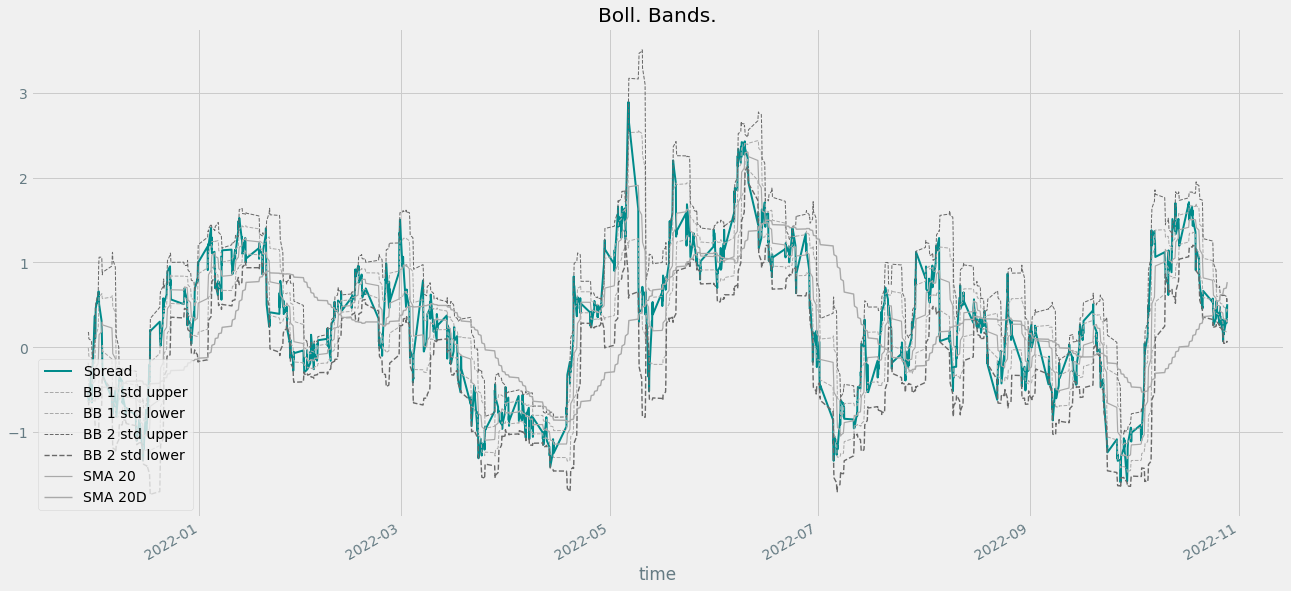

In [1365]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

def plot1(df, buysell=False):
    df['Close'].plot(label = 'Spread', color = 'darkcyan', linewidth = 2)
    df['bb_up_1'].plot(label = 'BB 1 std upper', linestyle = '--', linewidth = 1, color = 'darkgray')
    df['bb_low_1'].plot(label = 'BB 1 std lower', linestyle = '--', linewidth = 1, color = 'darkgray')
    df['bb_up_2'].plot(label = 'BB 2 std upper', linestyle = '--', linewidth = 1, color = 'dimgray')
    df['bb_low_2'].plot(label = 'BB 2 std lower', linestyle = '--', linewidth = 1.4, color = 'dimgray')
    df['sma_20'].plot(label = 'SMA 20',  linewidth = 1.2, color = 'darkgray')
    df['sma_20d'].plot(label = 'SMA 20D',  linewidth = 1.4, color = 'darkgray')
    plt.legend(loc = 'lower left')
    plt.title('Boll. Bands.')
    
    if buysell:
        plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
        plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
    
    plt.show()
    
plot1(df_spread_bb,0)

#### OPTION 2

In [1366]:
# add short date & time for plotly
df_spread_bb['shortdate'] = df_spread_bb.index
df_spread_bb['shortdate']  = pd.to_datetime(df_spread_bb.shortdate,utc=True)
df_spread_bb['shortdate']  = df_spread_bb['shortdate'].dt.tz_convert("Canada/Pacific")
df_spread_bb['shortdate'] = df_spread_bb['shortdate'].dt.strftime('%m/%d %H:%M')

In [1367]:
import plotly.graph_objects as go

def plot2(df, buysell=False):
    fig = go.Figure(data=[go.Candlestick(x=df.shortdate,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            increasing_line_color= 'PaleGreen', decreasing_line_color= 'salmon'),
            go.Scatter(x=df.shortdate, y=df.sma_20, line=dict(color='darkgray', width=1), name="SMA 20"),
            go.Scatter(x=df.shortdate, y=df.sma_20d, line=dict(color='darkgray', width=2), name="SMA 20D"),
            go.Scatter(x=df.shortdate, y=df['bb_low_2'], line=dict(color='dimgray', width=1, dash='dot'), name="BB 2 std lower"),
            go.Scatter(x=df.shortdate, y=df['bb_up_2'], line=dict(color='dimgray', width=1, dash='dot'), name="BB 2 std upper"),
            go.Scatter(x=df.shortdate, y=df['bb_low_1'], line=dict(color='darkgray', width=1, dash='dot'), name="BB 1 std lower"),
            go.Scatter(x=df.shortdate, y=df['bb_up_1'], line=dict(color='darkgray', width=1, dash='dot'), name="BB 1 std upper"),])

    fig.update_layout(xaxis_rangeslider_visible=False)
    #fig.update_layout(legend=dict(yanchor="bottom", y=1.0, xanchor="left", x=0.01))
    fig.update_xaxes(nticks=12) #default is 5
    fig.update_layout(xaxis=dict(type = "category")) #to eliminate after-hours
    
    if buysell:
        fig.add_scatter(x=df.shortdate, y=buy_price, mode="markers", marker_symbol="triangle-up", marker=dict(size=10, color="Green"), name="buy")
        fig.add_scatter(x=df.shortdate, y=sell_price, mode="markers", marker_symbol="triangle-down",marker=dict(size=10, color="Red"), name="sell")
        #fig.update_layout(xaxis_rangeslider_visible=True)
    
    fig.show()
 
plot2(df_spread_bb,0)

### STRATEGY & POSITIONS

#### STRATEGY 1

In [1368]:
# buy and sell at upper and lower bollinger band, exit at sma
def strategy_exit_sma(data, lower_bb, upper_bb, sma_20):
    buy_price = []
    sell_price = []
    bb_signal = []
    position = []
    signal = 0
      
    position = [0] * len(data)
      
    for i in range(len(data)):
        # define band crossings
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if position[i-1] == 0:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if position[i-1] == 0:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = -1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        # define sma crossings
        elif data[i - 1] > sma_20[i - 1] and data[i] < sma_20[i]:
            if position[i-1] != 0:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < sma_20[i - 1] and data[i] > sma_20[i]:
            if position[i-1] != 0:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = 0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            position[i] = position[i-1]

    return buy_price, sell_price, bb_signal, position


buy_price, sell_price, bb_signal, position = strategy_exit_sma(
    df_spread_bb["Close"],
    df_spread_bb["bb_low_2"],
    df_spread_bb["bb_up_2"],
    df_spread_bb["sma_20"],
)

#### STRATEGY 2

In [1369]:
# buy and sell at upper and lower bollinger band, keep position, no exit
def strategy_no_exit(data, lower_bb, upper_bb):

    buy_price = []
    sell_price = []
    bb_signal = []
    position = []
    signal = 0
    
    # create a zero position list until the first signal
    for i in range(len(data)):
        position.append(0)
    
    for i in range(len(data)):
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = -1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            position[i] = position[i-1]

    return buy_price, sell_price, bb_signal, position


buy_price, sell_price, bb_signal, position = strategy_no_exit(
    df_spread_bb["Close"], df_spread_bb["bb_low_2"], df_spread_bb["bb_up_2"]
)

#### STRATEGY 3 ('1H' RESOLUTION ONLY)

In [1370]:
if resolution.upper() == '1H':  # enable only for '1H resolution'

    # buy and sell at upper and lower bollinger band, exit at sma, no exit if moving towards 20d-sma
    def strategy_skp_sma20d(data, lower_bb, upper_bb, sma_20, sma_20d):
        buy_price = []
        sell_price = []
        bb_signal = []
        position = []
        signal = 0

        position = [0] * len(data)

        for i in range(len(data)):
            # define band crossings
            if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
                if position[i-1] != 1:
                    buy_price.append(data[i])
                    sell_price.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                    position[i] = 1
                else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]
            elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
                if position[i-1] != -1:
                    buy_price.append(np.nan)
                    sell_price.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                    position[i] = -1
                else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]

            # define sma crossings
            elif data[i - 1] > sma_20[i - 1] and data[i] < sma_20[i]:
                if data[i] < sma_20d[i]: # check 20d-sma
                    if position[i-1] == -1:
                        buy_price.append(data[i])
                        sell_price.append(np.nan)
                        signal = 1
                        bb_signal.append(signal)
                        position[i] = 0
                    else:
                        buy_price.append(np.nan)
                        sell_price.append(np.nan)
                        bb_signal.append(0)
                        position[i] = position[i-1]

                else: # moving towards 20d-sma               
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]


            elif data[i - 1] < sma_20[i - 1] and data[i] > sma_20[i]:
                if data[i] > sma_20d[i]: # check 20d-sma
                    if position[i-1] == 1:
                        buy_price.append(np.nan)
                        sell_price.append(data[i])
                        signal = -1
                        bb_signal.append(signal)
                        position[i] = 0
                    else:
                        buy_price.append(np.nan)
                        sell_price.append(np.nan)
                        bb_signal.append(0)
                        position[i] = position[i-1]

                else: # moving towards 20d-sma               
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]

            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        return buy_price, sell_price, bb_signal, position


    buy_price, sell_price, bb_signal, position = strategy_skp_sma20d(
        df_spread_bb["Close"],
        df_spread_bb["bb_low_2"],
        df_spread_bb["bb_up_2"],
        df_spread_bb["sma_20"],
        df_spread_bb["sma_20d"],
    )

#### PLOT

In [1371]:
plot2(df_spread_bb,1)

### BACKTEST

Prepare a new df for the strategy signal & positions:

In [1372]:
# Select bb to backtest
upper_bb = df_spread_bb['bb_up_2']
lower_bb = df_spread_bb['bb_low_2']
close_price = df_spread_bb['Close']
bb_signal_df = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df_spread_bb.index)
position_df = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df_spread_bb.index)

frames = [close_price, upper_bb, lower_bb, bb_signal_df, position_df]
strategy = pd.concat(frames, join = 'inner', axis = 1)

Define investment value & cost factors:

In [1373]:
contract_price = round(df2_1.iloc[-1,df2_1.columns.get_loc('Close')],0) # get the latest price
avg_fin_cost = 0.0002
pos_value = 7500 # x2 for pair buy & sell
mar_req = 0.3 # margin requirement
cash_req = mar_req * pos_value * 2 # required cash
avg_slip = 0.001 # per order per position value
avg_commission = 0.007 # per contract

if resolution.upper() == '1H':
    avg_fin_cost = 0.0002/7

contracts = pos_value/contract_price
number_of_stocks = math.floor(contracts)

In [1374]:
slip = bb_signal_df.bb_signal.abs()*avg_slip*pos_value
commission = bb_signal_df.bb_signal.abs()*avg_commission*contracts*2
fincost = position_df.bb_position.abs()*avg_fin_cost*(2*pos_value-cash_req)

#### BACKTEST & PRINT INITIAL RESULTS

In [1375]:
import math
from termcolor import colored as cl

df_spread_bb_ret = pd.DataFrame(np.diff(df_spread_bb['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

# calculate return per bar
for i in range(len(df_spread_bb_ret)):
    try:
        returns = df_spread_bb_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)    
        
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/cash_req)*100)
print(cl('Profit/Loss (costs excluded): {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit/Loss (costs excluded): {}%'.format(profit_percentage), attrs = ['bold']))

Profit/Loss (costs excluded): 2119.6
Profit/Loss (costs excluded): 47%


Calculate cumulative returns:

In [1376]:
cum_inv_ret = bb_investment_ret_df.cumsum()
cum_inv_ret.tail()

,investment_returns
1617,2107.70084
1618,2081.36004
1619,2070.40644
1620,2119.59984
1621,2119.59984


List orders:

In [1377]:
mask = strategy.bb_signal!=0
orders = strategy[mask][['bb_signal']].reset_index()
orders.tail()

,time,bb_signal
66,2022-10-11 11:30:00-04:00,-1
67,2022-10-12 14:30:00-04:00,-1
68,2022-10-19 10:30:00-04:00,1
69,2022-10-25 12:30:00-04:00,-1
70,2022-10-27 09:30:00-04:00,1


Calculate order returns & open position:

In [1378]:
strategy2 = strategy[['bb_signal']].reset_index()
strategy2['cum_return'] = cum_inv_ret

In [1379]:
mask = strategy2.bb_signal!=0
orders = strategy2[mask][['bb_signal','cum_return']]
orders = orders.reset_index().dropna()

# values = df.Prices * df.Amount
# df['Values'] = values.where(df.Action == 'Sell', other=-values)

orders['prof_loss'] = orders.cum_return.diff()
# set the fist order profit/loss
orders.at[0, 'prof_loss'] = orders['cum_return'][0]

# set open position profit/loss
orders.at[len(orders), 'prof_loss'] = total_investment_ret - orders.loc[orders.index[-1],'cum_return']
# orders.at[len(orders)-1, 'index'] = len(strategy2)-1
# orders.at[len(orders)-1, 'bb_signal'] = -orders.loc[orders.index[-2],'bb_signal']
orders.at[len(orders)-1, 'cum_return'] = total_investment_ret

orders.tail()

,index,bb_signal,cum_return,prof_loss
67,1536.0,-1.0,2044.16344,-35.40360
68,1567.0,1.0,2130.87944,86.71600
69,1597.0,-1.0,2012.99784,-117.88160
70,1608.0,1.0,1989.33024,-23.66760
71,NaN,NaN,2119.60000,130.26976


#### RESULT SUMMARY

In [1386]:
print(cl('Gross return: {}'.format(round(sum(orders['prof_loss']), 2)), attrs = ['bold']))
print(cl('Financial cost: {}'.format(-fincost.sum().round(1)), attrs = ['bold']))
print(cl('Total slip: {}'.format(-slip.sum().round(1)), attrs = ['bold']))
print(cl('Total commisson: {}'.format(-commission.sum().round(1)), attrs = ['bold']))
total_cost = slip.sum().round(1) + commission.sum().round(1)+fincost.sum().round(1)
print(cl('Net return: {}'.format(round(sum(orders['prof_loss'])-total_cost, 2)), attrs = ['bold']))

Gross return: 2119.6
Financial cost: -362.1
Total slip: -532.5
Total commisson: -324.1
Net return: 900.9
